<a href="https://colab.research.google.com/github/team0243/multivariate/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimension Scaling คือ การลดขนาดของตัวเเปร จากที่มีเยอะให้เหลือน้อยๆ

## Example on Iris dataset

In [ ]:
import pandas as pd

In [ ]:
example_df = pd.read_csv(
    'https://raw.github.com/pandas-dev/'
    'pandas/master/pandas/tests/io/data/csv/iris.csv'
)
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**ลอง plot PCA เพื่อเปรียบเทียบกับ วิธี MDS**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2) # เอาเเค่สองเเกนหลัก

In [ ]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])

In [ ]:
from matplotlib import pyplot as plt

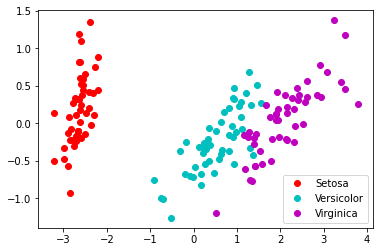

In [ ]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',label='Setosa')  # พร็อตเเบ่งสามพันธุ์
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'oc',label='Versicolor') 
plt.plot(new_pca[100:,0],new_pca[100:,1],'om',label='Virginica')
plt.legend()

## MDS(Multidimensional Scaling)

Distance คือ ระยะห่างระหว่างจุด

In [ ]:
X1 = example_df.iloc[0,:-1].to_numpy() # เอาตั้งเเต่จุดที่หนึ่งยกเว้นชื่อมัน
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [ ]:
X2 = example_df.iloc[1,:-1].to_numpy() # เอาตั้งเเต่จุดที่ 2 ยกเว้นชื่อมัน
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [ ]:
import numpy as np

In [ ]:
dist = np.linalg.norm(X1-X2) # ระยะห่างระหว่างจุดที่ 1 กับ 2
dist

0.5385164807134502

In [ ]:
(0.04 + 0.25)**(0.5) # sqrt การยกกำลัง 0.5

0.5385164807134504

## Distance Matrix คือ เเสดงถึงระยะห่างของเเต่ละจุด

In [ ]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix
# 0.53851648 ระยะห่างระหว่างจุด 1 กับ จุด 2

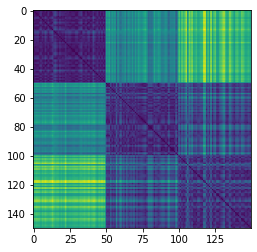

In [ ]:
plt.imshow(dis_matrix) # เเต่ละจุดในmatrix มาพร็อตเป็นสี ยิ่งค่ามาก สีสว่าง ยิ่งค่าน้อย(พันธุ์เดียวกัน) สีเข้ม

#ทำ MDS

In [ ]:
from sklearn.manifold import MDS # อยู่ในโฟลเดอร์ย่อย

In [ ]:
mds = MDS(n_components=2)

In [ ]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

In [ ]:
new_mds

**สนใจว่าจุดไหนห่างจากจุดไหนมากที่สุด**

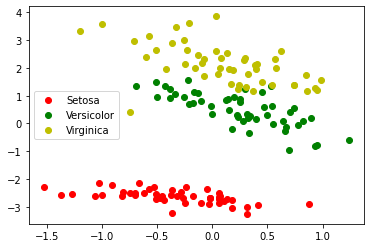

In [ ]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')  # พร็อตเเบ่งสามพันธุ์
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor') 
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.legend()

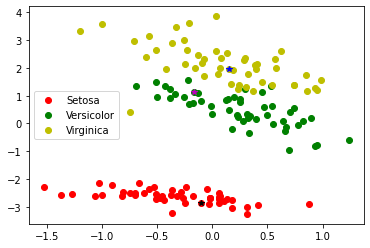

In [ ]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')  # พร็อตเเบ่งสามพันธุ์
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor') 
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1],'*k') # สุ่มจุด
plt.plot(new_mds[56,0],new_mds[56,1],'*m')  # m คือ สีม่วง
plt.plot(new_mds[116,0],new_mds[116,1],'*b')
plt.legend()  

## การใช้ Pre-computed Distance Matrix

In [ ]:
dis_matrix = pairwise_distances(example_df.iloc[:,:-1],metric = 'cityblock') ## 'cityblock'

In [ ]:
mds2 = MDS(n_components=2,dissimilarity ='precomputed')

In [ ]:
new_mds2 = mds.fit_transform(dis_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


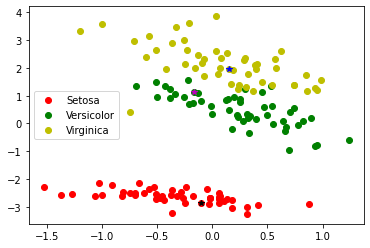

In [ ]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')  # พร็อตเเบ่งสามพันธุ์
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor') 
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1],'*k') # สุ่มจุด
plt.plot(new_mds[56,0],new_mds[56,1],'*m')  # m คือ สีม่วง
plt.plot(new_mds[116,0],new_mds[116,1],'*b')
plt.legend() 

##EX 2

https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # seaborn ไว้สำหรับวาดกราฟที่สวยงามได้มากกว่า matplotlib
import numpy as np

In [3]:
def make_hello(N=1000, rseed=42): # N = จำนวนจุด
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

In [4]:
X = make_hello(1000)

In [5]:
X.shape # ดูขนาดของ X 1000 จุด 2 คือ จุด x กับ y

(1000, 2)

*ไม่ใส่สี*

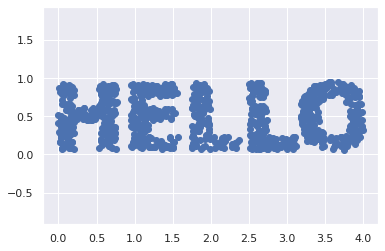

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');    # plt.axis ทำให้สเกลของเเต่ละเเกนเท่ากัน

## เรีกกดูฟังก์ชั่น เเละ พลอตสี

In [7]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5)) # c คือ ค่าในเเนวเเกน X

In [ ]:
colorize # ดูขนาดของdictionary

In [8]:
colorize['c'].shape # c = 1000 ตัว

(1000,)

In [9]:
colorize['cmap'] # cmap คือ เรนโบว์

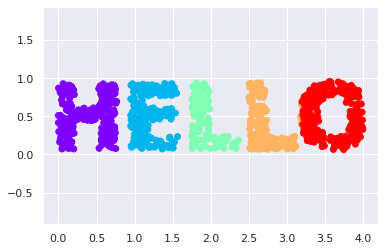

In [10]:
plt.scatter(X[:, 0], X[:, 1], **colorize) # เเบบใส่สีเเล้ว
plt.axis('equal');

## หมุน data

In [11]:
def rotate(X, angle): # ใส่ data 
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

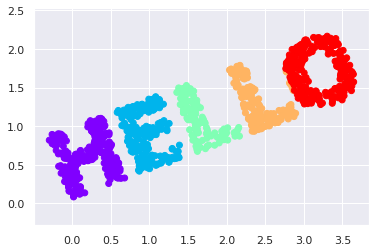

In [12]:
X2 = rotate(X, 20)  # หมุนในมุมกี่องศา หมุนใน 20 องศา
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

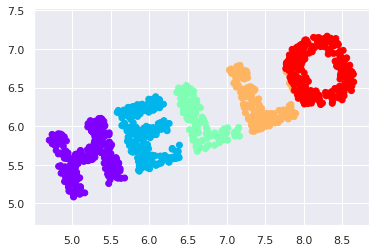

In [13]:
X2 = rotate(X, 20) + 5 # เลื่อนไปเเนวเเกน x เเละ y 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

## MDS

In [14]:
from sklearn.metrics import pairwise_distances # ดูระยะห่างของจุดเเต่ละจุด
D = pairwise_distances(X)
D.shape

(1000, 1000)

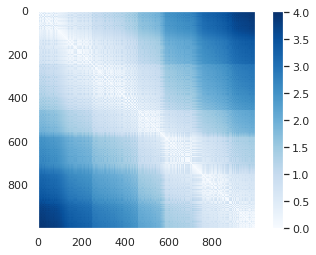

In [15]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar(); # บอกถึงสเกลทั้งหมดเป็นอย่างไร ยิ่งสีขาว เข้าใกล้ 0 ยิ่งสีเข้มเข้าใกล้ 4 สีน้ำเงินเข้ม คือ จุดที่ 1 เทียบกับจุดที่ 1000 เเปลว่าห่างกันประมาณ 4.0  

In [16]:
D2 = pairwise_distances(X2)

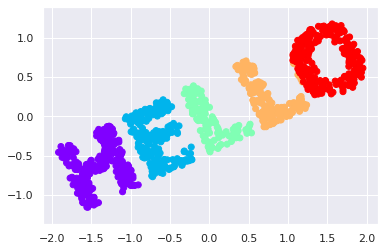

In [17]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1) # random_state สามารถฟิกได้ว่าตัวเเรกที่มาพร็อตคือตัวไหน ทำให้เหมือนกัน
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

* random_state
* zorder in plt.imshow 
* np.allclose()

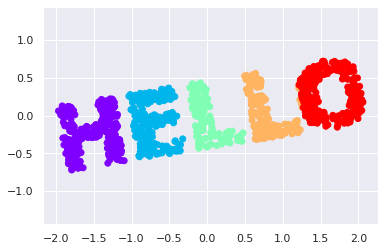

In [18]:
model = MDS(n_components=2, dissimilarity='precomputed') 
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

### ทดลองทำ PCA กับ ข้อมูล ```X``` เเล้ว plotgraph
### เเละดูผลว่าการกระจายของข้อมูลเปลี่ยนไปหรือไม่ อย่างไร
ส่งก่อน 14.15 commit ว่า quiz 4 

In [21]:
from sklearn.decomposition import PCA

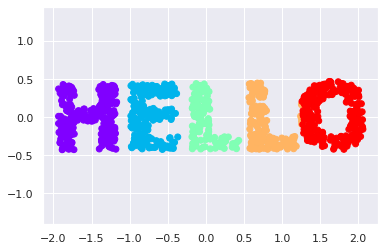

In [22]:
model = PCA(n_components=2 ) 
out = model.fit_transform(X2)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

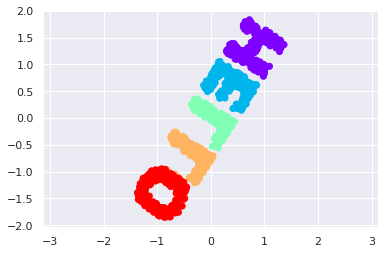

In [24]:
model = MDS(n_components=2, dissimilarity='precomputed') 
out = model.fit_transform(D2)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');